Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?

The code below doesn't work 

In [33]:
from __future__ import print_function, division
%matplotlib inline
import numpy as np
import nsfg
import thinkstats2
import first
import thinkplot

# TODO

1) get our pandas dataframe
2) get the series for totalwgt_lb
3) get the series for totalwgt_lb filtered by first babies
    - graph a histogram 
    - get the mean
    - get the std. dev
4) get the series for totalwgt_lb filtered by all non-first babies
    - graph a histogram
    - get the mean
    - get the std. dev
5) Get the Cohen's d as a difference between groups

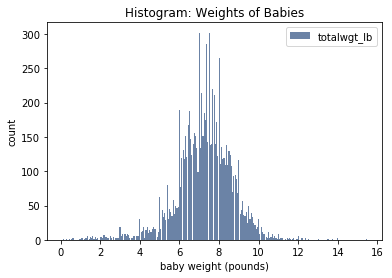

In [34]:
preg = nsfg.ReadFemPreg()  # preg is our dataframe
totalwgt_lb = preg['totalwgt_lb']
hist_totalwgt_lb = thinkstats2.Hist(totalwgt_lb, label='totalwgt_lb')
thinkplot.Hist(hist_totalwgt_lb)
thinkplot.Config(title='Histogram: Weights of Babies', xlabel='baby weight (pounds)', ylabel='count')

What's our sample size?

In [51]:
print("There's a sample size of: {0} babies".format(totalwgt_lb.size))
print("Mean baby weight (lbs) is: {0}".format(totalwgt_lb.mean()))
print("Variance baby weight (lbs) is: {0}".format(totalwgt_lb.var()))
print("Std. dev baby weight (lbs) is: {0}".format(totalwgt_lb.std()))

There's a sample size of: 13593 babies
Mean baby weight (lbs) is: 7.265628457623368
Variance baby weight (lbs) is: 1.9832904288326532
Std. dev baby weight (lbs) is: 1.4082934455690168


It seems like baby weights are heavily clustered around the mean and don't vary by much. However, the graph indicates some far-out numbers.

Let's examine for potential outliers...

In [52]:
for lbs, count in hist_totalwgt_lb.Largest(10):
    print(lbs, count)

15.4375 1
14.0 3
13.75 1
13.5 1
13.0 1
12.5 1
12.375 2
12.1875 2
12.0 5
11.9375 1


The weight values above 13lbs seem high, but they're not too far from our mean value that I think they could be reasonable. 

In [37]:
for lbs, count in hist_totalwgt_lb.Smallest(20):
    print(lbs, count)

0.125 1
0.3125 1
0.4375 1
0.5625 1
0.625 2
0.9375 1
1.0 1
1.0625 3
1.125 2
1.1875 1
1.25 2
1.3125 3
1.375 6
1.4375 1
1.5 4
1.5625 3
1.625 5
1.6875 1
1.75 4
1.8125 1


I think there are more outliers on the lower end of the scale. However, these weights aren't filtered by successful births or not, so a lot of these lower values may not have been successful births.
___

From the set of baby weights, we can filter by those which are firstborn by a mother versus those which are *not* firstborn by a mother. 

In [42]:
firsts_weights = preg[preg.pregordr==1].totalwgt_lb
non_firsts_weights = preg[preg.pregordr!=1].totalwgt_lb

In [43]:
firsts_weights_hist = thinkstats2.Hist(firsts_weights, label='firstborn')
non_firsts_weights_hist = thinkstats2.Hist(non_firsts_weights, label='not firstborn')

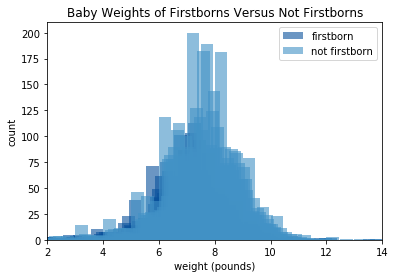

In [47]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(firsts_weights_hist, align='right', width=width)
thinkplot.Hist(non_firsts_weights_hist, align='left', width=width)
thinkplot.Config(title='Baby Weights of Firstborns Versus Not Firstborns', xlabel='weight (pounds)', ylabel='count', xlim=[2,14])

In [54]:
mean_diff = firsts_weights.mean() - non_firsts_weights.mean()
std_dev_diff = firsts_weights.std() - non_firsts_weights.std()
print("Mean difference between groups: {0} lbs".format(mean_diff))
print("Std dev difference between groups: {0} lbs".format(std_dev_diff))

Mean difference between groups: -0.09729209104654846 lbs
Std dev difference between groups: 0.010741278427921275 lbs


There's marginal difference between the mean and std dev of the groups. Non-first babies have a slightly higher mean by 0.09 lbs. 

In [55]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    The difference in means expressed in number of std deviations
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)  # avg variance between two groups
    d = diff / np.sqrt(pooled_var)  # 
    return d

In [56]:
CohenEffectSize(firsts_weights, non_firsts_weights)

-0.069118253488209339

The Cohen effect size is 0.069 standard deviations, which is a large effect. This value is a little over double the value for the Cohen effect size for pregnancy length. 